In [21]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

# Import the API key.
from config import weather_api_key

In [22]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [23]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [25]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | brenham
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | vigrestad
Processing Record 7 of Set 1 | odienne
Processing Record 8 of Set 1 | baiyin
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | big spring
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | vardo
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | saint-honore
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | mana
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | vanersborg
Processing Record 22 of Set 1 |

Processing Record 40 of Set 4 | ust-nera
Processing Record 41 of Set 4 | aksarka
Processing Record 42 of Set 4 | novo aripuana
Processing Record 43 of Set 4 | vanimo
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | morant bay
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | coihueco
Processing Record 48 of Set 4 | celestun
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | northam
Processing Record 1 of Set 5 | meridian
Processing Record 2 of Set 5 | tuktoyaktuk
Processing Record 3 of Set 5 | sao felix do xingu
Processing Record 4 of Set 5 | oga
Processing Record 5 of Set 5 | khatanga
Processing Record 6 of Set 5 | upata
Processing Record 7 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 8 of Set 5 | plettenberg bay
Processing Record 9 of Set 5 | qaanaaq
Processing Record 10 of Set 5 | tenali
Processing Record 11 of Set 5 | langarud
Processing Record 12 of Set 5 | kahului
Processing Record 13 of Set 5 

Processing Record 32 of Set 8 | prokhorovka
Processing Record 33 of Set 8 | zeya
Processing Record 34 of Set 8 | bayanday
Processing Record 35 of Set 8 | alofi
Processing Record 36 of Set 8 | havelock
Processing Record 37 of Set 8 | taiping
Processing Record 38 of Set 8 | lerwick
Processing Record 39 of Set 8 | ossora
Processing Record 40 of Set 8 | tezu
Processing Record 41 of Set 8 | bolu
Processing Record 42 of Set 8 | agirish
Processing Record 43 of Set 8 | villazon
Processing Record 44 of Set 8 | lorengau
Processing Record 45 of Set 8 | neuquen
Processing Record 46 of Set 8 | xining
Processing Record 47 of Set 8 | gornopravdinsk
Processing Record 48 of Set 8 | chara
Processing Record 49 of Set 8 | alexandria
Processing Record 50 of Set 8 | baykit
Processing Record 1 of Set 9 | presevo
Processing Record 2 of Set 9 | tawzar
City not found. Skipping...
Processing Record 3 of Set 9 | coromandel
Processing Record 4 of Set 9 | longonjo
Processing Record 5 of Set 9 | krasnogorsk
Processi

Processing Record 19 of Set 12 | staryy nadym
Processing Record 20 of Set 12 | north platte
Processing Record 21 of Set 12 | ziyang
Processing Record 22 of Set 12 | yuma
Processing Record 23 of Set 12 | pskov
Processing Record 24 of Set 12 | dwarka
Processing Record 25 of Set 12 | lake havasu city
Processing Record 26 of Set 12 | chabahar
Processing Record 27 of Set 12 | moissala
Processing Record 28 of Set 12 | pirenopolis
Processing Record 29 of Set 12 | jiwani
Processing Record 30 of Set 12 | villarrica
Processing Record 31 of Set 12 | auki
Processing Record 32 of Set 12 | praia
Processing Record 33 of Set 12 | namatanai
Processing Record 34 of Set 12 | agadez
Processing Record 35 of Set 12 | amderma
City not found. Skipping...
Processing Record 36 of Set 12 | stanari
Processing Record 37 of Set 12 | isiolo
Processing Record 38 of Set 12 | chikoy
City not found. Skipping...
Processing Record 39 of Set 12 | okato
Processing Record 40 of Set 12 | marquette
Processing Record 41 of Set 

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,86.16,70,40,10.36,TO,2022-02-02 02:56:43
1,Albany,42.6001,-73.9662,29.05,71,100,3.00,US,2022-02-02 02:57:42
2,Ushuaia,-54.8000,-68.3000,42.46,65,40,37.98,AR,2022-02-02 02:57:43
3,Brenham,30.1669,-96.3977,60.98,87,100,0.00,US,2022-02-02 02:57:43
4,Port Alfred,-33.5906,26.8910,77.49,74,100,7.18,ZA,2022-02-02 02:54:12
5,Vigrestad,58.5667,5.7000,39.58,74,36,34.23,NO,2022-02-02 02:57:44
6,Odienne,9.5100,-7.5692,69.75,18,61,4.21,CI,2022-02-02 02:57:44
7,Baiyin,36.5583,104.2081,16.68,40,97,2.62,CN,2022-02-02 02:57:44
8,Saldanha,-33.0117,17.9442,66.25,96,78,12.19,ZA,2022-02-02 02:57:44
9,Saint George,37.1041,-113.5841,43.39,24,0,1.99,US,2022-02-02 02:53:13


In [42]:
new_column_order =["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [43]:
city_data_df=city_data_df[new_column_order]

In [44]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-02-02 02:56:43,-21.2000,-175.2000,86.16,70,40,10.36
1,Albany,US,2022-02-02 02:57:42,42.6001,-73.9662,29.05,71,100,3.00
2,Ushuaia,AR,2022-02-02 02:57:43,-54.8000,-68.3000,42.46,65,40,37.98
3,Brenham,US,2022-02-02 02:57:43,30.1669,-96.3977,60.98,87,100,0.00
4,Port Alfred,ZA,2022-02-02 02:54:12,-33.5906,26.8910,77.49,74,100,7.18
...,...,...,...,...,...,...,...,...,...
566,Hambantota,LK,2022-02-02 03:12:54,6.1241,81.1185,76.86,70,54,11.74
567,Aykhal,RU,2022-02-02 03:12:11,66.0000,111.5000,-18.99,100,12,2.53
568,Camacha,PT,2022-02-02 03:12:54,33.0833,-16.3333,62.53,77,20,16.11
569,Prince George,CA,2022-02-02 03:11:12,53.9166,-122.7530,-9.58,100,19,1.07


In [46]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

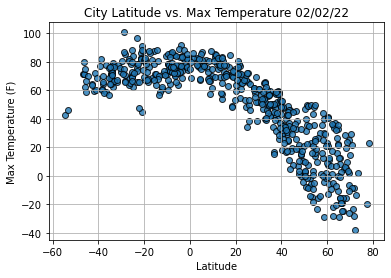

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

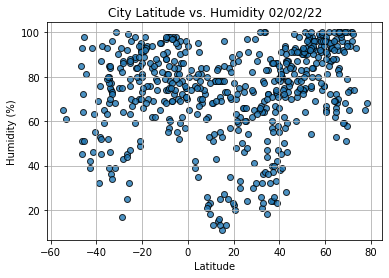

In [49]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

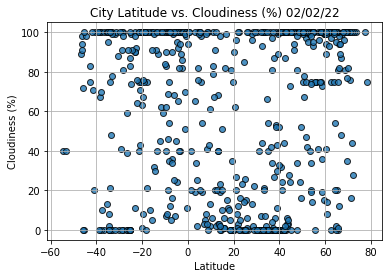

In [50]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

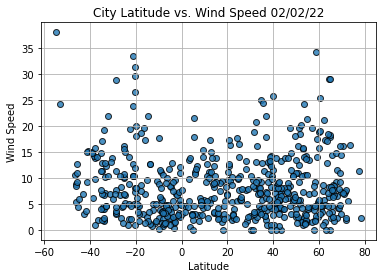

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [62]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
        

In [64]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Albany,US,2022-02-02 02:57:42,42.6001,-73.9662,29.05,71,100,3.00
3,Brenham,US,2022-02-02 02:57:43,30.1669,-96.3977,60.98,87,100,0.00
5,Vigrestad,NO,2022-02-02 02:57:44,58.5667,5.7000,39.58,74,36,34.23
6,Odienne,CI,2022-02-02 02:57:44,9.5100,-7.5692,69.75,18,61,4.21
7,Baiyin,CN,2022-02-02 02:57:44,36.5583,104.2081,16.68,40,97,2.62


In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

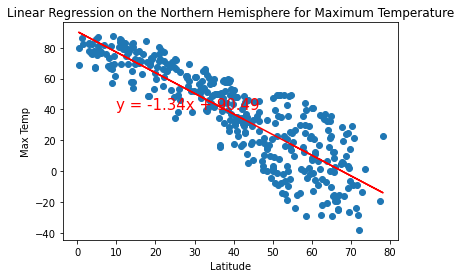

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

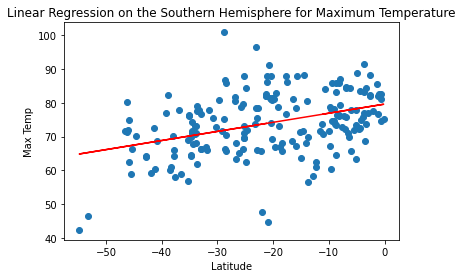

In [72]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

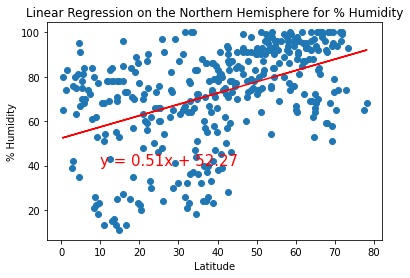

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(10,40))

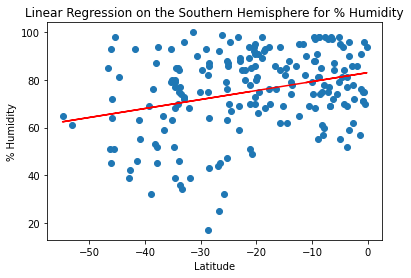

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(10,40))

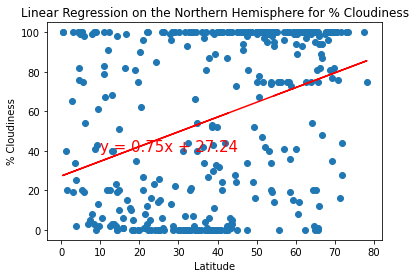

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,40))

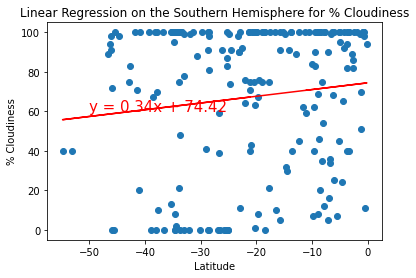

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

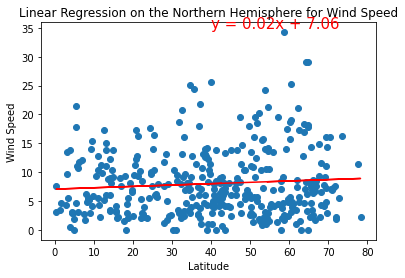

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

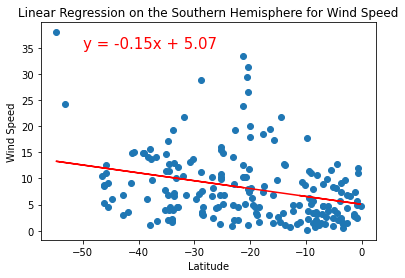

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))